# Adaline

# Adaptives Lineares Neuron (Adaline)

In [2]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [3]:
class Adaline(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        self.w = np.random.normal(loc=0.01, size=3)
        self.w[0] = 1
        self.cost = []
        
    def gewichtete_summe(self, x):
        '''In dieser Methode wird die beschriebene gewichtete Summe berechnet.'''
        return x.dot(self.w)
    
    def activation(self, X):
        '''Diese Funktion bewirkt im Code nichts, denn es handelt sich um eine Identitätsfunktion. Sie existiert zur Demonstration, wie Informationen durch ein einschichtiges Neuronales Netz fließen'''
        return X
        
    def _add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        biased_X = np.hstack((bias, X))
        return biased_X
    
    def fit(self, X, y):
        '''Die Berechnung der Gewichtsaktualisierung erfolgt auf allen Trainingsobjekten'''
        X = self._add_bias(X)
        for e in range(self.epochs):
            cost_epoch = 0
            errors = []

            for i in range(len(X)):
                summe = self.gewichtete_summe(X[i])
                activation_sum = self.activation(summe)
                errors.append(activation_sum)

            #Δ𝑤𝑗=𝜂⋅(𝑦−𝑛𝑒𝑡)⋅𝑥𝑗 
            Y_minus_error = np.subtract(y, np.array(errors))
            self.w = self.w + self.eta * X.T.dot(Y_minus_error)
            cost_epoch= (np.array(Y_minus_error ) ** 2).sum() / 2.0
            self.cost.append(cost_epoch)

        return self.cost 


## Datensatz, Training und Visualisierung des Errors

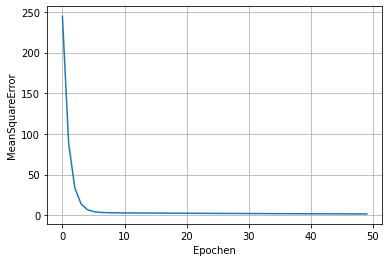

In [5]:
df = pd.read_csv("../Data/iris.data", header=None, sep=",")
df_shuffled = df.sample(frac=1) 

dffilter = df_shuffled[df_shuffled[4]!="Iris-virginica"].copy()
dffilter.loc[dffilter[4] == "Iris-setosa" , 4] =  0
dffilter.loc[dffilter[4] == "Iris-versicolor" , 4] =  1

myAdaline = Adaline(eta=0.0001, epochs=50)
    
X = np.array(dffilter[[0,2]])
y = np.array(dffilter[4])

error = myAdaline.fit(X,y)
fig, ax = plt.subplots()
ax.plot(range(len(error)), error)

ax.set(xlabel='Epochen', ylabel='MeanSquareError')
ax.grid()

plt.show()